### Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
    a. Import the necessary packages
    b. Load the training and testing data 
    c. Define the network architecture using Keras 
    d. Train the model using SGD/Adam optimizer
    e. Evaluate the network  
    f. Plot the training loss and accuracy

In [1]:
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

2022-11-15 14:49:42.295325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 14:49:42.595701: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 14:49:42.595722: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-15 14:49:42.630428: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 14:49:50.825374: W tensorflow/stream_executor/platform/de

In [2]:
## Loading the training and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
## Reshaping by converting to array
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

In [5]:
## Scaling 
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [6]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

## Define the network architecture using Keras

In [7]:
model = Sequential()

model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

2022-11-15 14:50:04.307566: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 14:50:04.307597: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 14:50:04.307620: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (akash-kulkarni): /proc/driver/nvidia/version does not exist
2022-11-15 14:50:04.307878: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
sgd = SGD(learning_rate=0.01, momentum=0)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


## Train the model using SGD with 11 epochs

In [9]:
batch_size = 512
epochs = 11

history = model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=batch_size, epochs=epochs)

Epoch 1/11


2022-11-15 14:50:04.577874: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


98/98 [==============================] - ETA: 0s - loss: 2.0968 - accuracy: 0.2575

2022-11-15 14:50:12.748492: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


98/98 [==============================] - 9s 84ms/step - loss: 2.0968 - accuracy: 0.2575 - val_loss: 1.9800 - val_accuracy: 0.3190
Epoch 2/11
98/98 [==============================] - 8s 86ms/step - loss: 1.9297 - accuracy: 0.3301 - val_loss: 1.8961 - val_accuracy: 0.3420
Epoch 3/11
98/98 [==============================] - 10s 102ms/step - loss: 1.8627 - accuracy: 0.3509 - val_loss: 1.8487 - val_accuracy: 0.3559
Epoch 4/11
98/98 [==============================] - 9s 96ms/step - loss: 1.8216 - accuracy: 0.3666 - val_loss: 1.8187 - val_accuracy: 0.3623
Epoch 5/11
98/98 [==============================] - 9s 89ms/step - loss: 1.7913 - accuracy: 0.3750 - val_loss: 1.7862 - val_accuracy: 0.3742
Epoch 6/11
98/98 [==============================] - 9s 94ms/step - loss: 1.7655 - accuracy: 0.3880 - val_loss: 1.7590 - val_accuracy: 0.3851
Epoch 7/11
98/98 [==============================] - 9s 94ms/step - loss: 1.7468 - accuracy: 0.3919 - val_loss: 1.7432 - val_accuracy: 0.3953
Epoch 8/11
98/98 [====

## Evaluate the network 

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

 16/313 [>.............................] - ETA: 2s - loss: 1.7689 - accuracy: 0.3809

2022-11-15 14:51:45.259692: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 7ms/step - loss: 1.7113 - accuracy: 0.3969
Test Loss: 1.7112771272659302, Test Accuracy: 0.3968999981880188


In [11]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Plotting the training loss and accuracy

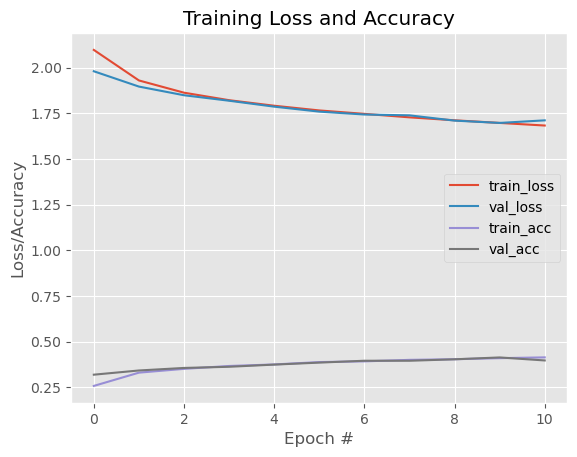

In [12]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()